In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy.stats import bernoulli, binom
import matplotlib.pyplot as plt

## Statistical Models: Binomial Model

The **Binomial Model** describes the sum of a fixed number of independent indicator variables.
The Binomial **Random Variable** (RV) with parameters  $n$(trials) and $p$ (probability) is defined as the sum of $n$ independent Bernoulli random variables, all with parameter $p$. In a particular experiment, if we model the occurrence of a specific event occurring $x = \{1,2,\cdots,6\}$ occurring from among a $100$ sample trials:

\begin{align}
x_1, \cdots, x_{100} \quad \overset{\text{i.i.d}}{\text{~}} \quad \text{Bernouli}(p)
\end{align}

then the number of the experiment can be modelled as a binomial random variable with parameter $p$. In statistical language, we say that a binomial random variable is the sum of independent Bernoulli trials, where each Bernoulli trial represents a single indicator variable.

From the definition, we can compute the **Probability Mass Function** (PMF) of a Binomial Random Variable $X$ with parameters $n$ and $p$ to be

\begin{align}
&\mathbf{f(X=x)} = \left( \array{n\\x}\right)\cdot p^x \cdot (1-p)^{n-x}\\
\\
\text{where:}&\\
\left(\array{n\\x}\right) &: \text{number of different ways of choosing out of the  Bernoulli variables}\\
p^x &: \text{is the probability of event occurring.}\\
(1-p)^{n-x} &: \text{is the probability of event not occurring.}
\end{align}

#### Examples
- Suppose a company sends out 1000 emails and the probability of the recepient opening the mail is $0.2$.
- Tossing a coin $10$ times and probability of getting 5 heads.
- Survey for 1000 people if they will vote for certain candidate (e.g., n=1000, p=0.6)

**Example** Coin flip which can yield either head or tail 

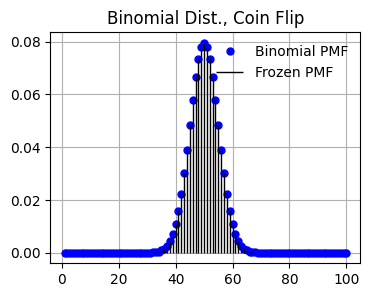

In [17]:
n = 100
k = 1
p = k/2
x = np.linspace(1,n,n,dtype=int)
y = binom.pmf(x, n, p)
# Plot
fig,ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(x, y,"bo", ms=5, label="Binomial PMF")
# Frozen Dist
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='Frozen PMF')
#ax.vlines(x, 0, y, colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.set_title("Binomial Dist., Coin Flip")
plt.grid(":")
plt.legend(loc="best", frameon=False)
plt.show()

x = np.arange(binom.ppf(0.00001, n, p), binom.ppf(0.99999, n, p))
prob = binom.cdf(x, n, p)
assert np.allclose(x, binom.ppf(prob, n, p))

[1. 2. 3. 4. 5. 6. 7. 8.]


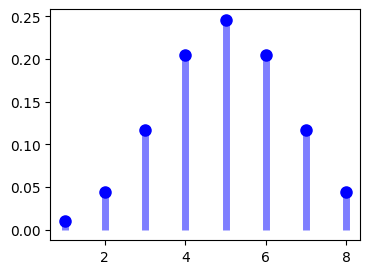

In [68]:
x=np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
print(x)
fig, ax = plt.subplots(1, 1, figsize=(4,3))
# Probability of x heads in n trials
y = binom.pmf(x, n, p)
ax.plot(x, y, 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
plt.show()

**Experiment** Probability of getting heads in flipping coin 10 times in 500 trial.

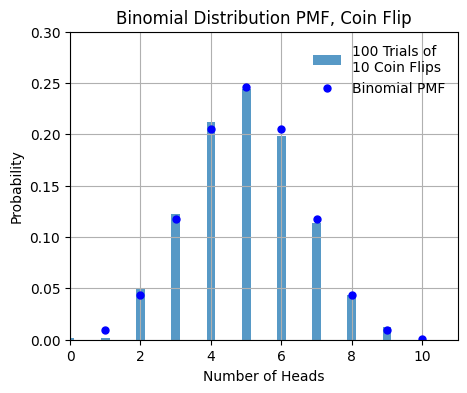

In [4]:
# Parameters
n = 10
p = 1/2
s = 500 # Trials
# Simulate coin toss
num_heads = []
for _ in range(s):
    res = np.random.binomial(n=1, p=p, size=n)
    num_heads.append(res.sum())
# Graph the samples
fig, ax = plt.subplots(1, 1, figsize=(5,4))
ax.hist(num_heads, np.arange(n+1), label="100 Trials of \n10 Coin Flips", 
        align="left", density=True, alpha=0.75, rwidth=0.25)
# PMF
x = np.linspace(1, n, n)
pmf = binom.pmf(x,  n, p)
ax.plot(x, pmf,"bo", ms=5, label="Binomial PMF")
ax.legend(loc="best", frameon=False)
ax.set_xlim([0, 11])
ax.set_ylim([0, 0.3])
ax.set_title("Binomial Distribution PMF, Coin Flip")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Heads")
plt.grid(":")
plt.show()

**Example** Probability of $x=\{1,\cdots,6\}$ event occurring when rolling a fair dice.

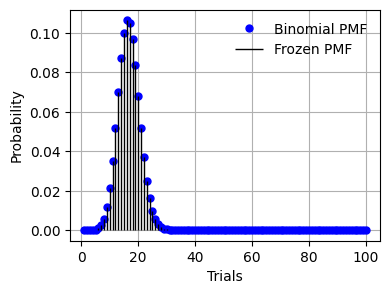

In [168]:
n = 100
k = 1
p = k/6
x = np.linspace(1,n,n,dtype=int)
y = binom.pmf(x, n, p)
# Plot
fig,ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(x, y,"bo", ms=5, label="Binomial PMF")
# Frozen Dist
rv = binom(n,p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='Frozen PMF')
#ax.vlines(x, 0, y, colors='k', linestyles='-', lw=1, label='frozen pmf')
ax.set_ylabel("Probability")
ax.set_xlabel("Trials")
plt.legend(loc="best", frameon=False)
plt.grid(":")
plt.show()
x = np.arange(binom.ppf(0.00001, n, p), binom.ppf(0.99999, n, p))
prob = binom.cdf(x, n, p)
assert np.allclose(x, binom.ppf(prob, n, p))

**Experiment** Roll a dice in 100 trials.

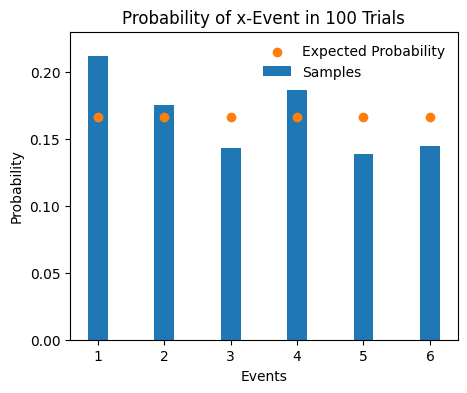

In [193]:
die = [1,2,3,4,5,6]
n = len(die)
p = 1/n
s = 100 # Trials

# Simulate dice rolls
events = []
for _ in range(s):
    trials = np.zeros(6)
    for j in range(n):
        trials[j] = np.random.choice(die)
    events.append(trials)

events = np.array(events)
unique, counts = np.unique(events, return_counts=True)
data = dict(zip(unique, counts))
data_ = dict()
for i in range(1, 6+1):
    if i in data.keys():
        data_[i] = 0 if data[i] == 0 else data[i]/(n*s)
    else:
        data_[i] = 0
# Plot data
fig,ax = plt.subplots(1, 1, figsize=(5,4))
ax.bar(data_.keys(), data_.values(), width=0.3, label="Samples")
ax.scatter(dice, [p,p,p,p,p,p], label="Expected Probability")
ax.legend(loc="best", frameon=False)
ax.set_xlabel("Events")
ax.set_ylabel("Probability")
ax.set_ylim([0, 0.23])
ax.set_title("Probability of x-Event in 100 Trials")
plt.show()

#### Binomial vs Bernoulli Distribution: A quick Comparison
\begin{align}
\left[\array{
 & \textbf{Bernouli} & \textbf{Binomial}\\
\text{Description} & \text{Random variable with two outcomes; 1 and 0} & \text{Sum of iid random variables}\\
\text{Use} & \text{Single Trial} & \text{Multiple Trials}\\
\text{Notation} & p & \text{n(trials), p(success probability)}\\
\text{Mean Formula} & \text{p} & \text{np}\\
\text{Variance Formula} & p(1-p) & np(1-p)\\
\text{Example} & \text{A bulb lighting or not} & \text{No of success in 10 trials}\\
}\right]
\end{align}